



<center>$\huge{\textbf{A Survey on Universal Approximation Theorems}}$</center>
<center>$\hspace{.1cm}$</center>



$\large{\textbf{1. Introduction}}$

A neural network (NN) or artificial neural network (ANN) is a network of artificial neurons arranged in layers. The artificial neurons (also called perceptrons) are inspired by biological neurons in biological neural networks (BNNs).  
 Biological neurons are the signal-processing units of BNN in the brain, similarly,  artificial neurons are data-processing units in  ANN. The rest of the paper discusses only ANN and artificial neurons which will be referred to simply by NN and neuron.  From a mathematical point of view, neurons are made of compositions of a nonlinear function (also called activation function) and a linear function. Therefore, NNs which are a network of neurons can be considered as a nonlinear function. In this paper, we are focusing on the results on feedforward neural networks (FNNs) aka multi-layer perceptrons (MLPs) which are the simplest and most popular category of NNs. Nowadays, NN is one of the most trending area in artificial intelligence (AI) and machine learning (ML) because of its ability to model complicated relationships. UATs are theorems associated with the approximation capabilities of NNs i.e., the ability of an NN to approximate arbitrary functions.  In general, UATs imply that NNs with appropriate parameters can approximate any continuous functions, i.e. are generalized models which can represent complicated relationship in the data.

$\large{\textbf{2. Neural Network (NN)}}$  

 NN is a network of neurons that are arranged in layers.  Each layer transforms its input data and gives an output. And the output of the layer will be the input of the next layer.
Therefore from a mathematical point of view, NN is a $\textbf{composite function}$ of the following form:

\begin{equation}
    y=f_{L+1}(f_{L}(...(f_{1}(f_{0}(x)))) \hspace{11.75cm} (3)
\end{equation}

where $f_{0},f_{1},f_{2},...,f_{L+1}$ are $\textbf{layers}$ of the NN which are composite functions of the form:

\begin{equation}
    f_{i}(x)=\sigma(Ax+b)  \hspace{14cm} (4)
\end{equation}

The functions $f_{i}$ consist of two components:

  1. $\color{red}{\textbf{Affine function}}$: is the linear component which is of the form $Ax+b.$

  2.   $\color{red}{\textbf{Activation function}}$: is the nonlinear component. The activation functions that are commonly used in NNs are listed below:

  a) $\color{red}{\textbf{ReLU}}$ (Rectified Linear Unit) function:
       \begin{equation}
        \sigma(x)=\max(0,x)= \begin{cases}
        0, \hspace{0.3cm} & if \hspace{0.1cm} x\leq 0\\
        x, \hspace{0.3cm} &if \hspace{0.1cm} x >0
        \end{cases}
       \end{equation}   

  b) $\color{red}{\textbf{Step}}$ function:
       \begin{equation}
        \sigma(x)=\begin{cases}
        0, \hspace{0.3cm} & if \hspace{0.1cm} x\leq 0\\
        1, \hspace{0.3cm} &if \hspace{0.1cm} x >0
        \end{cases}
       \end{equation}

  c) $\color{red}{\textbf{Logistic}}$ function:
      \begin{equation}
      \sigma(x)=\frac{1}{1+e^{-x}}
      \end{equation}
  d)   $\color{red}{\textbf{Tanh}}$ (hyperbolic tan) function:
      \begin{equation}
        \sigma(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}
      \end{equation}


<center>

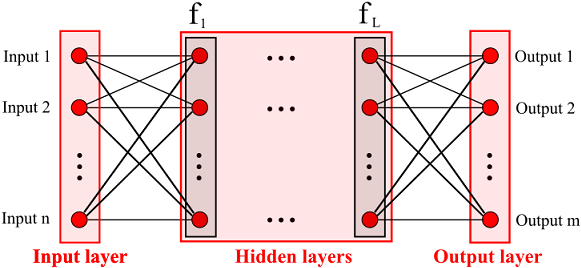

</center>

The graph of different activation functions are plotted next.

In [ ]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

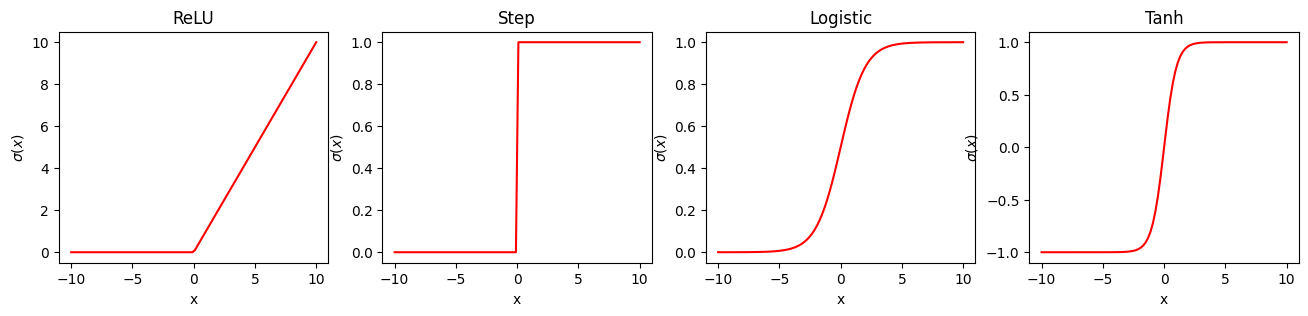

In [ ]:
m1=100
beta=0.5
X = np.linspace(-10, 10, 100)
Ya=np.zeros(len(X))
Yb=np.zeros(len(X))
Yc=np.zeros(len(X))
Yd=np.zeros(len(X))
for i in range(len(X)):
  Ya[i] = np.max([X[i],0])                             # ReLU
  Yb[i] = np.heaviside(X[i],0)                         # Step
  Yc[i] = np.divide(1, 1+ np.exp(-X[i]))               # Sigmoid
  Yd[i] = np.tanh(X[i])                                # Tanh
fig, axs = plt.subplots(1, 4, figsize =(16, 3))
axs[0].plot(X, Ya, c = 'r');
axs[0].set_title("ReLU")
axs[0].set_xlabel('x')
axs[0].set_ylabel('$\sigma(x)$')
axs[1].plot(X, Yb, c = 'r');
axs[1].set_title("Step")
axs[1].set_xlabel('x')
axs[1].set_ylabel('$\sigma(x)$')
axs[2].plot(X, Yc, c = 'r');
axs[2].set_title("Logistic")
axs[2].set_xlabel('x')
axs[2].set_ylabel('$\sigma(x)$')
axs[3].plot(X, Yd, c = 'r');
axs[3].set_title("Tanh")
axs[3].set_xlabel('x')
axs[3].set_ylabel('$\sigma(x)$')
plt.savefig('fig1.svg')

The terminologies and notations used are listed below:


1.  Number of observations: $N$
3.  Number of input variables: $n$
3.  Number of output variables: $m$
3.  Number of output variables in $i^{th}$ hidden layer: $m_{i}$ where $i=1,2,...L$
3.  Input data or input matrix: $X$
4.  Output data or output (label) matrix: $Y$
5.  Training input data: $X_{tr}$
6.  Training output data: $Y_{tr}$
9.  Testing input data: $X_{ts}$
10. Testing output data: $Y_{ts}$



In this section, we illustrate the basic computations in NN using Python. In the examples will be using the ReLu function as the activation function. As an example, we can consider an NN with one input, one output, a linear output layer, and one hidden layer with three neurons which can be represented as
 \begin{equation}
   y=\textbf{A}_{2} \sigma_{1}(\textbf{A}_{1}x+\textbf{b}_{1})+b_{2}.
 \end{equation}
Let $\textbf{A}_{2}=\left[\begin{matrix}   0.1 &   0.3 &  0.7 \end{matrix}\right], \textbf{A}_{1}=\left[\begin{matrix}   3 \\   -1 \\  2 \end{matrix}\right],$ $\textbf{b}_{1}=\left[\begin{matrix}   -1 \\   4 \\  10 \end{matrix}\right],$ $b_{2}=2,$ $\sigma_{1}=\textbf{tanh}$ which will expand above equation as:
\begin{equation}
    y=0.1 \hspace{.1cm} tanh (3x-1) + 0.3 \hspace{.1cm} tanh (-x+4) + 0.7 \hspace{.1cm} tanh (2x+10)+2
\end{equation}
and for $x \in [-10,10]$ we can compute the output by substituting in the equation. The code below do this computation and plot the output for different $\textbf{A}_{2}$ matrices.

Text(0, 0.5, '$y$')

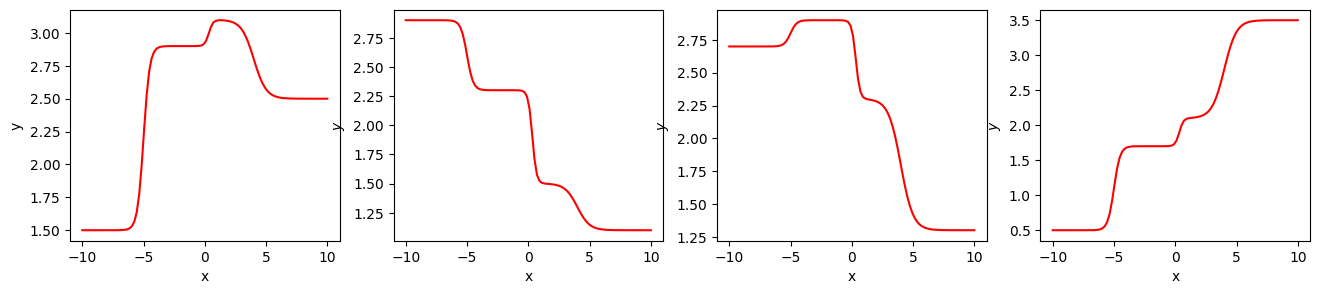

In [ ]:
X = np.linspace(-10, 10, 100)
Y11=np.zeros(len(X))
Y12=np.zeros(len(X))
Y13=np.zeros(len(X))
Ya=np.zeros(len(X))
Yb=np.zeros(len(X))
Yc=np.zeros(len(X))
Yd=np.zeros(len(X))
for i in range(len(X)):
 Y11[i] = np.tanh(3*X[i]-1)
 Y12[i] = np.tanh(-1*X[i]+4)
 Y13[i] = np.tanh(2*X[i]+10)
 Ya[i]  = 0.1*Y11[i]+0.3*Y12[i]+0.7*Y13[i]+2
 Yb[i]  = -0.4*Y11[i]+0.2*Y12[i]-0.3*Y13[i]+2
 Yc[i]  = -0.3*Y11[i]+0.5*Y12[i]+0.1*Y13[i]+2
 Yd[i]  = 0.2*Y11[i]+-0.7*Y12[i]+0.6*Y13[i]+2
fig, axs = plt.subplots(1, 4, figsize =(16, 3))
axs[0].plot(X, Ya, c = 'r');
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[1].plot(X, Yb, c = 'r')
axs[1].set_xlabel('x')
axs[1].set_ylabel('$y$')
axs[2].plot(X, Yc, c = 'r')
axs[2].set_xlabel('x')
axs[2].set_ylabel('$y$')
axs[3].plot(X, Yd, c = 'r')
axs[3].set_xlabel('x')
axs[3].set_ylabel('$y$')

$\large{\textbf{3. Universal Approximation Theorems (UATs)}}$

$\textbf{UATs: Arbitrary width case}$

Here we are considering NNs with more than one neuron per layer. To simplify the illustration we consider examples with only one hidden layer as shown in the figure below.

<center>

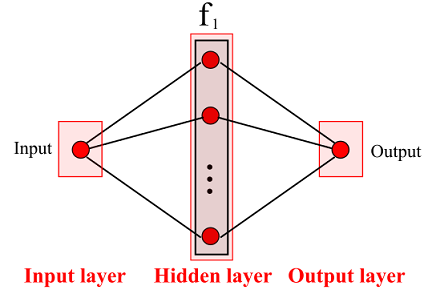

</center>

Here we denote the output of the first neuron in first hidden layer as $y_{11}$ and the second neuron as $y_{12}$ and so on. Let's start with the following NNs with ReLU activation functions:
\begin{equation}
    \begin{aligned}
      &(a) \hspace{.5cm} y=\text{ReLU}(2 x+ 1)\\
        &(b) \hspace{.5cm}y=\text{ReLU}(- x- 2)\\
        &(c) \hspace{.5cm}y=\text{ReLU}(2 x+ 1)+\text{ReLU}(- x - 1)\\
        &(d) \hspace{.5cm}y=\text{ReLU}(2 x+ 1)+\text{ReLU}(- x- 2)+\text{ReLU}(4 x- 20)
    \end{aligned}
\end{equation}
which corresponds to NNs with one neuron (a,b), two neurons (c), and three neurons (d).

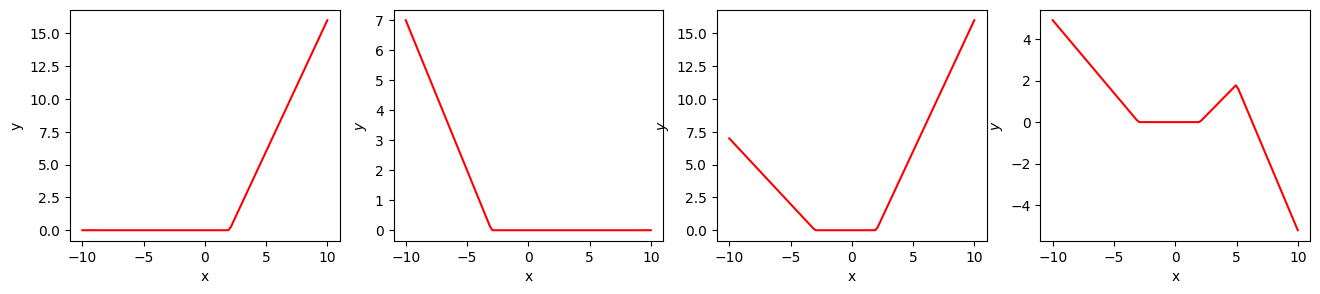

In [ ]:
X = np.linspace(-10, 10, 100)
Y11=np.zeros(len(X))
Y12=np.zeros(len(X))
Y13=np.zeros(len(X))
Ya=np.zeros(len(X))
Yb=np.zeros(len(X))
for i in range(len(X)):
 Y11[i] = np.max([(2*X[i]-4),0])
 Y12[i] = np.max([(-1*X[i]-3),0])
 Y13[i] = np.max([(4*X[i]-20),0])
 Ya[i]  = Y11[i]+Y12[i]
 Yb[i]  = 0.3*Y11[i]+0.7*Y12[i]-0.5*Y13[i]
fig, axs = plt.subplots(1, 4, figsize =(16, 3))
axs[0].plot(X, Y11, c = 'r');
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[1].plot(X, Y12, c = 'r')
axs[1].set_xlabel('x')
axs[1].set_ylabel('$y$')
axs[2].plot(X, Ya, c = 'r')
axs[2].set_xlabel('x')
axs[2].set_ylabel('$y$')
axs[3].plot(X, Yb, c = 'r')
axs[3].set_xlabel('x')
axs[3].set_ylabel('$y$')
plt.savefig('fig5.svg')

Here with two neurons, we obtained a folded line with two folds. Further with three neurons, we obtained a folded line with three folds. By adding more neurons, we can add more folds in the line. Folded lines are also called a piecewise linear curve. Therefore with a ReLU activation function, we can obtain piecewise linear approximations of continuous functions. Moreover, we can also use other activation functions like sigmoid, tanh, etc for getting smooth approximations. This will be illustrated in the next section.   

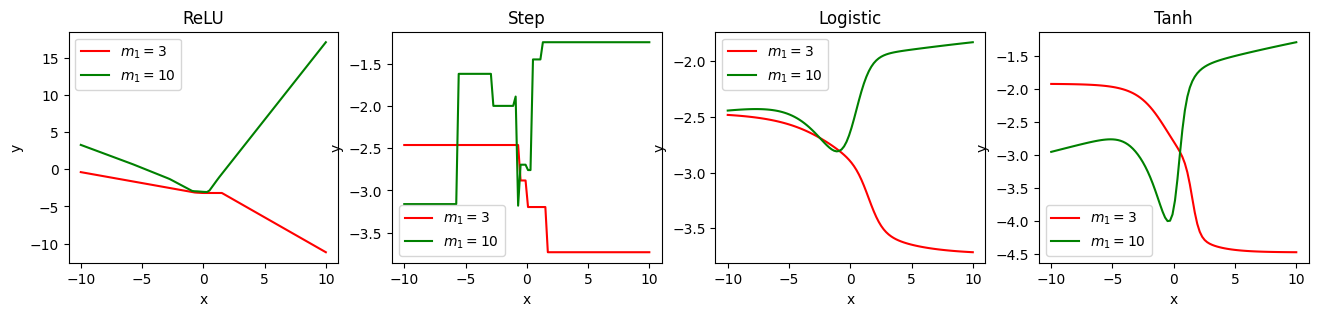

In [ ]:
m1=3
X = np.linspace(-10, 10, 100)
Y1a=np.zeros(m1)
Y1b=np.zeros(m1)
Y1c=np.zeros(m1)
Y1d=np.zeros(m1)
Ya=np.zeros(len(X))
Yb=np.zeros(len(X))
Yc=np.zeros(len(X))
Yd=np.zeros(len(X))
rng = np.random.RandomState(11)    # By changing the RandomState input argument we can get different outputs
A1=rng.randn(m1)
b1=rng.randn(m1)
A2=rng.randn(m1)
b2=rng.randn(1)
for i in range(len(X)):
 for j in range(m1):
  Y1a[j] = np.max([(A1[j]*X[i]+b1[j]),0])                                        # ReLU
  Y1b[j] = np.heaviside(A1[j]*X[i]+b1[j],0)                                      # Step
  Y1c[j] = np.divide(1, 1+ np.exp(-(A1[j]*X[i]+b1[j])))                          # Sigmoid
  Y1d[j] = np.tanh(A1[j]*X[i]+b1[j])                                            # Tanh
 Ya[i]  = np.sum(np.multiply(A2,Y1a)+b2)
 Yb[i]  = np.sum(np.multiply(A2,Y1b)+b2)
 Yc[i]  = np.sum(np.multiply(A2,Y1c)+b2)
 Yd[i]  = np.sum(np.multiply(A2,Y1d)+b2)



m1=10
X = np.linspace(-10, 10, 100)
Y1a=np.zeros(m1)
Y1b=np.zeros(m1)
Y1c=np.zeros(m1)
Y1d=np.zeros(m1)
Ya1=np.zeros(len(X))
Yb1=np.zeros(len(X))
Yc1=np.zeros(len(X))
Yd1=np.zeros(len(X))
A1=rng.randn(m1)
b1=rng.randn(m1)
A2=rng.randn(m1)
b2=rng.randn(1)
for i in range(len(X)):
 for j in range(m1):
  Y1a[j] = np.max([(A1[j]*X[i]+b1[j]),0])                                        # ReLU
  Y1b[j] = np.heaviside(A1[j]*X[i]+b1[j],0)                                      # Step
  Y1c[j] = np.divide(1, 1+ np.exp(-(A1[j]*X[i]+b1[j])))                          # Sigmoid
  Y1d[j] = np.tanh(A1[j]*X[i]+b1[j])                                            # Tanh
 Ya1[i]  = np.sum(np.multiply(A2,Y1a)+b2)
 Yb1[i]  = np.sum(np.multiply(A2,Y1b)+b2)
 Yc1[i]  = np.sum(np.multiply(A2,Y1c)+b2)
 Yd1[i]  = np.sum(np.multiply(A2,Y1d)+b2)

fig, axs = plt.subplots(1, 4, figsize =(16, 3))
axs[0].plot(X, Ya, c = 'r');
axs[0].plot(X, Ya1, c = 'g');
axs[0].set_title("ReLU")
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend(['$m_{1}=3$','$m_{1}=10$'])
axs[1].plot(X, Yb, c = 'r');
axs[1].plot(X, Yb1, c = 'g');
axs[1].set_title("Step")
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].legend(['$m_{1}=3$','$m_{1}=10$'])
axs[2].plot(X, Yc, c = 'r');
axs[2].plot(X, Yc1, c = 'g');
axs[2].set_title("Logistic")
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].legend(['$m_{1}=3$','$m_{1}=10$'])
axs[3].plot(X, Yd, c = 'r');
axs[3].plot(X, Yd1, c = 'g');
axs[3].set_title("Tanh")
axs[3].set_xlabel('x')
axs[3].set_ylabel('y')
axs[3].legend(['$m_{1}=3$','$m_{1}=10$'])
plt.savefig('fig8.svg')

$\textbf{UATs: Arbitrary depth case}$


<center>

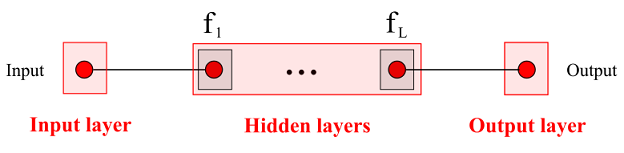

</center>

For NNs with one neuron per hidden layer, we can have three possible output curves:
   

  1.   A straightline
  2.   A folded line with one fold
  3.   A folded line with two folds


These three cases are illustrated next using the following NNs:
\begin{equation}
    \begin{aligned}
      &(a) \hspace{.5cm} y=\text{ReLU}(0 x+ 5)\\
        &(b) \hspace{.5cm}y=\text{ReLU}(2 x+ 4)\\
        &(c) \hspace{.5cm}y=\text{ReLU}\big(-0.5 {\color{red}[}\text{ReLU}(2 x+ 4) {\color{red}]}+ 5 \big)\\
        &(d) \hspace{.5cm}y=\text{ReLU}\big(-2 [\text{ReLU}(-0.5[\text{ReLU}(2 x+ 4)]+ 5)  ]+ 3\big)
    \end{aligned}
\end{equation}

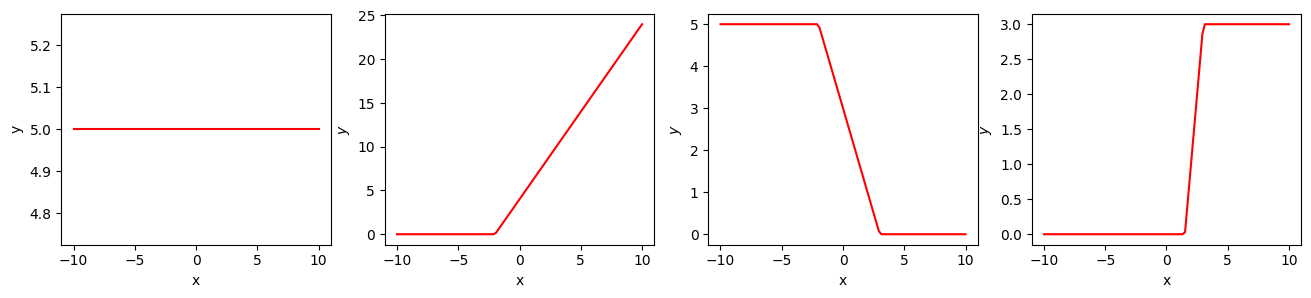

In [ ]:
X = np.linspace(-10, 10, 100)
Y1=np.zeros(len(X))
Y2=np.zeros(len(X))
Y3=np.zeros(len(X))
Y=np.zeros(len(X))
for i in range(len(X)):
 Y1[i] = np.max([(2*X[i]+4),0])
 Y2[i] = np.max([(-0.5*Y1[i]+5),0])
 Y3[i] = np.max([(-2*Y2[i]+3),0])
 Y[i]  = Y3[i]
fig, axs = plt.subplots(1, 4, figsize =(16, 3))
axs[0].plot(X, 0*X+5, c = 'r');
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[1].plot(X, Y1, c = 'r')
axs[1].set_xlabel('x')
axs[1].set_ylabel('$y$')
axs[2].plot(X, Y2, c = 'r')
axs[2].set_xlabel('x')
axs[2].set_ylabel('$y$')
axs[3].plot(X, Y, c = 'r')
axs[3].set_xlabel('x')
axs[3].set_ylabel('$y$')
plt.savefig('fig3.svg')

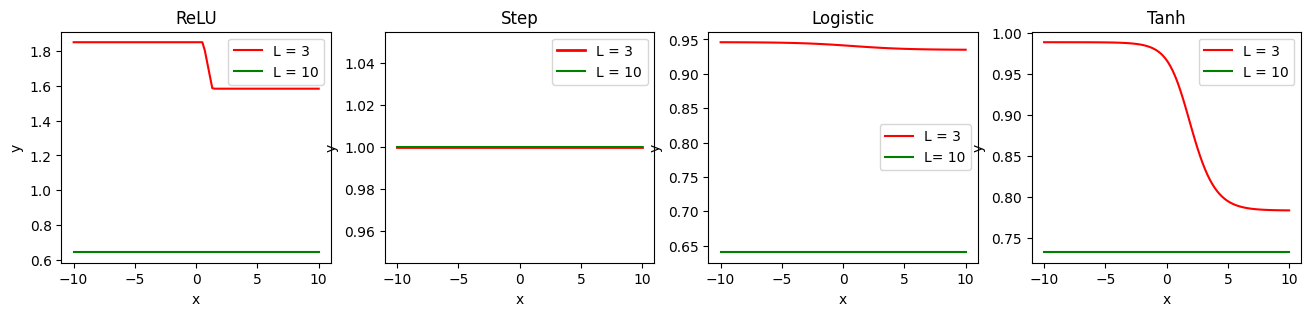

In [ ]:
L=3
X = np.linspace(-10, 10, 100)
Yja=np.zeros(L)
Yjb=np.zeros(L)
Yjc=np.zeros(L)
Yjd=np.zeros(L)
Ya=np.zeros(len(X))
Yb=np.zeros(len(X))
Yc=np.zeros(len(X))
Yd=np.zeros(len(X))
rng = np.random.RandomState(5) # By changing the RandomState input argument we can get different outputs
A1=rng.randn(L)
b1=rng.randn(L)
A2=rng.randn(L)
b2=rng.randn(1)
for i in range(len(X)):
 Yja[0]=np.max([(A1[0]*X[i]+b1[0]),0])
 Yjb[0]=np.heaviside(A1[0]*X[i]+b1[0],0)
 Yjc[0]=np.divide(1, 1+np.exp(-(A1[0]*X[i]+b1[0])))
 Yjd[0]=np.tanh(A1[0]*X[i]+b1[0])
 for j in range(1,L):
  Yja[j] = np.max([(A1[j]*Yja[j-1]+b1[j]),0])                                        # ReLU
  Yjb[j] = np.heaviside(A1[j]*Yjb[j-1]+b1[j],0)                                      # Step
  Yjc[j] = np.divide(1, 1+ np.exp(-(A1[j]*Yjc[j-1]+b1[j])))                              # Sigmoid
  Yjd[j] = np.tanh(A1[j]*Yjd[j-1]+b1[j])                                                 # Tanh
 Ya[i]  = Yja[j]
 Yb[i]  = Yjb[j]
 Yc[i]  = Yjc[j]
 Yd[i]  = Yjd[j]


L=10
X = np.linspace(-10, 10, 100)
Yja=np.zeros(L)
Yjb=np.zeros(L)
Yjc=np.zeros(L)
Yjd=np.zeros(L)
Ya1=np.zeros(len(X))
Yb1=np.zeros(len(X))
Yc1=np.zeros(len(X))
Yd1=np.zeros(len(X))
rng = np.random.RandomState(5) # By changing the RandomState input argument we can get different outputs
A1=rng.randn(L)
b1=rng.randn(L)
A2=rng.randn(L)
b2=rng.randn(1)
for i in range(len(X)):
 Yja[0]=np.max([(A1[0]*X[i]+b1[0]),0])
 Yjb[0]=np.heaviside(A1[0]*X[i]+b1[0],0)
 Yjc[0]=np.divide(1, 1+np.exp(-(A1[0]*X[i]+b1[0])))
 Yjd[0]=np.tanh(A1[0]*X[i]+b1[0])
 for j in range(1,L):
  Yja[j] = np.max([(A1[j]*Yja[j-1]+b1[j]),0])                                        # ReLU
  Yjb[j] = np.heaviside(A1[j]*Yjb[j-1]+b1[j],0)                                      # Step
  Yjc[j] = np.divide(1, 1+ np.exp(-(A1[j]*Yjc[j-1]+b1[j])))                              # Sigmoid
  Yjd[j] = np.tanh(A1[j]*Yjd[j-1]+b1[j])                                                 # Tanh
 Ya1[i]  = Yja[j]
 Yb1[i]  = Yjb[j]
 Yc1[i]  = Yjc[j]
 Yd1[i]  = Yjd[j]
fig, axs = plt.subplots(1, 4, figsize =(16, 3))
axs[0].plot(X, Ya, c = 'r');
axs[0].plot(X, Ya1, c = 'g');
axs[0].set_title("ReLU")
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend(['L = 3','L = 10'])
axs[1].plot(X, Yb, c = 'r', linewidth=2);
axs[1].plot(X, Yb1, c = 'g');
axs[1].set_title("Step")
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].legend(['L = 3','L = 10'])
axs[2].plot(X, Yc, c = 'r');
axs[2].plot(X, Yc1, c = 'g');
axs[2].set_title("Logistic")
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].legend(['L = 3','L= 10'])
axs[3].plot(X, Yd, c = 'r');
axs[3].plot(X, Yd1, c = 'g');
axs[3].set_title("Tanh")
axs[3].set_xlabel('x')
axs[3].set_ylabel('y')
axs[3].legend(['L = 3','L = 10'])
plt.savefig('fig4.svg')


$\large{\textbf{4. Conclusions and Further reading}}$

This paper discussed the major results and theorems on the approximation capabilities of NNs. For a more detailed study on AI, ML, and NN, one can refer to the books [1], [2]. A lecture series on NN and AI can be found at [3]. For more details on UATs [4-7] can be referred.

$\large{\textbf{References}}$
1. G. Strang,  $\textit{Linear algebra and Learning from data},$ Wellesley-Cambridge Press, 2019.

2. M. Zaki and W. Meira, $\textit{Data mining and Machine learning},$ Cambridge University Press, 2020.

3. M. Augustine, $\textit{AI using Python,}$  Youtube,
https://www.youtube.com/playlist?list=PL0IUz_pjFlJ1KbhNLRrxVGczzwiI0xhgE.

4. K. Funahashi, $\textit{On the approximate realization of continuous mappings by neural networks\textquotedblright,}$ Neural Networks,
vol. 2, pp. 183–192, 1989.

5. G. Cybenko, $\textit{Approximation by superpositions of a sigmoidal function},$ Mathematics of Control,
Signals, and Systems, Vol. 2, Dec. 1989.

6. K. Hornik, M. Stinchcombe, H. White, $\textit{Multilayer Feedforward Networks are Universal Approximators,}$ Neural Networks, Vol. 2, pp. 359–366, Mar. 1989.

7. Z. Lu, H. Pu, F. Wang, Z. Hu, and L. Wang, $\textit{The Expressive Power of Neural Networks: A View from the Width,}$ $31^{st}$ Conference on Neural Information Processing Systems, Long Beach, CA, USA., 2017.
    
